# Analisis Faktor - Faktor yang Mempengaruhi Stunting di Sulawesi Tenggara

   Analisis mengenai faktor-faktor yang memengaruhi stunting merupakan langkah penting dalam pemahaman dan penanganan masalah gizi buruk pada anak. Stunting, atau pertumbuhan terhambat pada anak, bukan sekadar masalah kesehatan yang signifikan, melainkan juga memiliki dampak jangka panjang yang serius. Anak-anak yang mengalami stunting cenderung menghadapi hambatan dalam pertumbuhan fisik dan perkembangan kognitif, yang berpengaruh signifikan terhadap kualitas hidup mereka. Lebih dari itu, stunting pada masa anak-anak dapat menyebabkan penurunan produktivitas di masa dewasa, meningkatkan risiko penyakit kronis, dan mengurangi kemampuan kognitif.

   Analisis mengenai faktor-faktor yang memengaruhi stunting juga erat kaitannya dengan pencapaian salah satu tujuan pembangunan berkelanjutan atau Sustainable Development Goals (SDGs), yakni Tujuan Pembangunan Berkelanjutan Nomor 2. Tujuan ini bertujuan untuk "Mengakhiri Kelaparan, Meraih Keamanan Pangan, Peningkatan Gizi, dan Mendorong Pertanian Berkelanjutan." Stunting merupakan indikator penting dalam upaya mencapai Tujuan Pembangunan Berkelanjutan ini. Dengan menganalisis faktor-faktor yang memengaruhi stunting, kita memberikan kontribusi penting dalam upaya meningkatkan gizi anak-anak, yang merupakan langkah kunci dalam mengatasi kelaparan dan meningkatkan keamanan pangan.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Collecting Data

Pada tahap ini, kami mengumpulkan data - data yang diambil dari berbagai sumber. Kami akan mengumpulkan faktor - faktor apa saja yang mempengaruhi stunting berdasarkan kutipan jurnal atau pendapat para ahli

Berdasarkan Fakumi Medical Journal 2021, Volume 2 Nomor 12, Faktor penyebab stunting terdiri dari faktor ekonomi, pendidikan ibu, usia anak dan BBLR (Berat Badan Lahir Rendah).
source: https://fmj.fk.umi.ac.id/index.php/fmj/article/view/70

Sedangkan menurut Kementrian Kesehatan kehamilan remaja, rendahnya akses terhadap pelayanan kesehatan dan akses sanitasi. source: https://yankes.kemkes.go.id/view_artikel/1529/faktor-faktor-penyebab-kejadian-stunting-pada-balita

### Web Scrapping

Scrapping dilakukan pada tiap website untuk mengambil data yang didapatkan

Saat melalukan web scrapping yang pertama perlu dilakukan adalah mengirim request untuk melihat apakah web tersebut dapat discrapping atau tidak

In [ ]:
url = 'https://sultra.bps.go.id/indicator/23/248/1/jumlah-penduduk-miskin-provinsi-sulawesi-tenggara-menurut-kabupaten-kota.html'
respon = requests.get(url)
respon

<Response [200]>

Karna respon code status yang diterima adalah 200, artinya web dapat discrapping.

In [ ]:
soup = BeautifulSoup(respon.text, 'html.parser')
tabel = soup.find('tbody')

In [ ]:
rows = tabel.findAll('tr')

In [ ]:
hasil = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    hasil.append(cols)

#### Menampilkan data Penduduk Miskin di Sulawesi Tenggara Tahun 2020, 2021, 2022 (RB)

Ekonomi merupakan salah satu faktor yang dapat mempengaruhi stunting melalui akses terhadap gizi, pelayanan kesehatan, dan sanitasi. Keluarga dengan kondisi ekonomi buruk cenderung kesulitan mendapatkan makanan bergizi, mengakses layanan kesehatan, dan mempertahankan sanitasi yang baik. (WHO 2017)

In [ ]:
df_miskin = pd.DataFrame(hasil)
df_miskin = df_miskin.drop(index=17)
df_miskin.columns = ['Wilayah', '2020 (RB)', '2021 (RB)', '2022 (RB)']
# df_miskin.columns.name = 'Jumlah Penduduk Miskin'
df_miskin

,Wilayah,2020 (RB),2021 (RB),2022 (RB)
0,Buton,13.68,14.25,13.61
1,Muna,28.73,30.54,30.48
2,Konawe,31.63,32.46,32.09
3,Kolaka,23.76,33.45,31.56
4,Konawe Selatan,34.22,36.17,35.79
5,Bombana,18.84,19.73,19.21
6,Wakatobi,13.75,15.30,15.01
7,Kolaka Utara,19.83,21.36,20.63
8,Buton Utara,9.13,9.45,9.13
9,Konawe Utara,8.78,9.26,9.02


#### Jumlah Bayi Lahir, Berat Badan Lahir Rendah dan Gizi Buruk 2021

Data mengenai jumlah bayi lahir, berat badan lahir rendah, dan gizi buruk diambil karena data ini memberikan wawasan tentang kondisi kesehatan anak-anak di wilayah Sulawesi Tenggara pada tahun 2021. Angka bayi lahir, berat badan lahir rendah, dan gizi buruk adalah faktor-faktor penting yang dapat berkontribusi terhadap stunting, yang memungkinkan identifikasi hubungan antara tingkat stunting dan kondisi kesehatan anak-anak

In [ ]:
url1 = 'https://sultra.bps.go.id/statictable/2022/04/18/3669/jumlah-bayi-lahir-bayi-berat-badan-lahir-rendah-bblr-dan-bergizi-kurang-menurut-kabupaten-kota-di-sulawesi-tenggara-2021.html'
respon1 = requests.get(url1)
soup1 = BeautifulSoup(respon1.text, 'html.parser')

tabels1 = soup1.find('div', {'id': 'isi-tabel', 'class': 'tabel'})
tabel1 = tabels1.find_all('table')[1]  # Pastikan indeks ke-1 sesuai dengan tabel yang ingin Anda scrape
rows1 = tabel1.findAll('tr')

In [ ]:
hasil1 = []
for row1 in rows1[2::]:
    cols1 = row1.find_all('td')
    cols1 = [ele1.text.strip() for ele1 in cols1]
    hasil1.append(cols1)

df_bayi = pd.DataFrame(hasil1)

In [ ]:
df_bayi = df_bayi.drop(index=[17,18,19])
df_bayi.columns = ['Wilayah', 'Bayi Lahir', 'Berat Bayi Lahir Rendah', 'Gizi Kurang']
df_bayi

,Wilayah,Bayi Lahir,Berat Bayi Lahir Rendah,Gizi Kurang
0,Buton,1 700,-,410
1,Muna,3 606,48,406
2,Konawe,4 119,107,202
3,Kolaka,4 396,250,381
4,Konawe Selatan,5 796,266,132
5,Bombana,3 406,160,392
6,Wakatobi,1 022,29,443
7,Kolaka Utara,2 656,68,119
8,Buton Utara,1 357,56,174
9,Konawe Utara,1 191,10,132


#### Persentase Pernikahan Dini Berdasarkan Umur

Berdasarkan UU Nomor 16 Tahun 2019, perkawinan hanya boleh dilakukan oleh pria dan wanita yang telah berusia 19 tahun. Namun Badan Kependudukan dan Keluarga Berencana Nasional (BKKBN) merekomendasikan usia ideal yaitu 21 tahun untuk menikah. Hal tersebut dikarenakan usia psikologis yang dianggap tidak labil. Kematangan usia mental anak, potensi kehamilan dini yang tidak berbahaya, serta potensi yang minim kanker rahim atau serviks pada remaja

In [ ]:
url2 = 'https://sultra.bps.go.id/statictable/2022/08/11/3836/persentase-perempuan-yang-pernah-kawin-berumur-10-tahun-ke-atas-menurut-kabupaten-kota-dan-umur-perkawinan-pertama-2021.html'
respon2 = requests.get(url2)
soup2 = BeautifulSoup(respon2.text, 'html.parser')

tabels2 = soup2.find('div', {'id': 'isi-tabel', 'class': 'tabel'})
tabel2 = tabels2.find_all('table')[1]
rows2 = tabel2.findAll('tr')

In [ ]:
hasil2 = []
for row2 in rows2[2::]:
    cols2 = row2.find_all('td')
    cols2 = [ele2.text.strip() for ele2 in cols2]
    hasil2.append(cols2)

df_pernikahan = pd.DataFrame(hasil2)

In [ ]:
df_pernikahan = df_pernikahan.drop(index=[17,18,19])
df_pernikahan = df_pernikahan.reset_index(drop=True)

In [ ]:
df_pernikahan.columns = ['Wilayah','<=16','17-18','19-20','21+','jumlah']

In [ ]:
df_pernikahan = df_pernikahan.reset_index(drop=True)

In [ ]:
df_pernikahan

,Wilayah,<=16,17-18,19-20,21+,jumlah
0,Buton,"13,49","22,62","24,55","39,34","100,00"
1,Muna,"8,55","20,84","27,03","43,58","100,00"
2,Konawe,"22,38","22,49","17,15","37,98","100,00"
3,Kolaka,"12,56","24,02","21,66","41,76","100,00"
4,Konawe\r\n Selatan,"23,15","21,18","24,04","31,63","100,00"
5,Bombana,"20,53","23,80","20,16","35,51","100,00"
6,Wakatobi,"9,66","20,35","28,53","41,46","100,00"
7,Kolaka\r\n Utara,"19,53","25,52","19,78","35,17","100,00"
8,Buton\r\n Utara,"16,80","24,97","19,60","38,62","100,00"
9,Konawe\r\n Utara,"18,10","26,42","20,14","35,35","100,00"


#### Persentase Rumah Tangga yang Memiliki Akses Terhadap Layanan Sanitasi Layak

Akses yang memadai terhadap sanitasi, seperti toilet yang layak, sangat relevan dalam memahami tingkat kebersihan dan kesehatan di rumah tangga. Kondisi sanitasi yang buruk dapat berkontribusi pada penyebaran penyakit dan gizi buruk, yang, pada gilirannya, dapat memengaruhi pertumbuhan anak dan meningkatkan risiko stunting. Oleh karena itu, data ini membantu dalam mengevaluasi dampak kondisi sanitasi terhadap stunting

In [ ]:
url3 = 'https://sultra.bps.go.id/statictable/2022/04/20/3686/persentase-rumah-tangga-yang-memiliki-akses-terhadap-layanan-sanitasi-layak-menurut-kabupaten-kota-di-provinsi-sulawesi-tenggara-2017-2021.html'
respon3 = requests.get(url3)
soup3 = BeautifulSoup(respon3.text, 'html.parser')

tabels3 = soup3.find('div', {'id': 'isi-tabel', 'class': 'tabel'})
tabel3 = tabels3.find_all('table')[1]  # Pastikan indeks ke-1 sesuai dengan tabel yang ingin Anda scrape
rows3 = tabel3.findAll('tr')

In [ ]:
hasil3 = []
for row3 in rows3[2::]:
    cols3 = row3.find_all('td')
    cols3 = [ele3.text.strip() for ele3 in cols3]
    hasil3.append(cols3)

df_sanitasi = pd.DataFrame(hasil3)

In [ ]:
df_sanitasi = df_sanitasi.drop(index=[17,18,19]).reset_index(drop = True)
df_sanitasi.columns = ['wilayah','2017','2018','2019','2020','2021','','']

In [ ]:
df_sanitasi

,wilayah,2017,2018,2019,2020,2021,,
0,Buton,"73,97","66,22","79,18","79,72","79,37",,
1,Muna,"63,30","72,02","68,07","71,22","79,85",,
2,Konawe,"74,71","80,30","81,38","76,41","89,72",,
3,Kolaka,"69,01","76,57","81,90","87,43","87,35",,
4,Konawe Selatan,"58,93","64,24","73,47","73,80","76,75",,
5,Bombana,"60,26","68,19","74,16","82,75","82,50",,
6,Wakatobi,"82,42","81,25","77,38","81,49","84,99",,
7,Kolaka Utara,"69,70","75,70","81,71","84,76","86,18",,
8,Buton Utara,"59,60","63,21","61,39","79,45","69,43",,
9,Konawe Utara,"70,53","72,88","77,00","76,97","76,58",,


#### Data Penduduk

Data ini akan digunakan untuk menghitung persentase masyarakat miskin terhadap jumlah penduduk

In [ ]:
url4 = 'https://sultra.bps.go.id/statictable/2022/03/23/3626/jumlah-penduduk-menurut-jenis-kelamin-di-provinsi-sulawesi-tenggara-2021.html'
respon4 = requests.get(url4)
soup4 = BeautifulSoup(respon4.text, 'html.parser')

tabels4 = soup4.find('div', {'id': 'isi-tabel', 'class': 'tabel'})
tabel4 = tabels4.find_all('table')[1]
rows4 = tabel4.findAll('tr')

In [ ]:
hasil4 = []
for row4 in rows4[2::]:
    cols4 = row4.find_all('td')
    cols4 = [ele4.text.strip() for ele4 in cols4]
    hasil4.append(cols4)

df_penduduk = pd.DataFrame(hasil4)

In [ ]:
df_penduduk = df_penduduk.drop(index=[17,18,19]).reset_index(drop=True)
df_penduduk.columns = ['Wilayah', 'Laki - laki','Perempuan','Jumlah','','','','','','','']
df_penduduk

,Wilayah,Laki - laki,Perempuan,Jumlah,,,,,,,
0,Buton,59 141,57 899,117 040,,,,,,,
1,Muna,107 439,111 517,218 956,,,,,,,
2,Konawe,135 086,126 030,261 116,,,,,,,
3,Kolaka,123 149,118 217,241 366,,,,,,,
4,Konawe Selatan,160 461,152 213,312 674,,,,,,,
5,Bombana,76 766,75 144,151 910,,,,,,,
6,Wakatobi,56 634,56 488,113 122,,,,,,,
7,Kolaka Utara,71 177,68 057,139 234,,,,,,,
8,Buton Utara,34 586,33 128,67 714,,,,,,,
9,Konawe Utara,35 636,33 314,68 950,,,,,,,


#### Data Stunting

Data ini didapat dari website berita sultra.jpnn.com yang mengutip kata dari Asmar, Kepala BKKBN Sultra. Ia mengatakan bahwa angka stunting di Sultra masih berada di atas rata-rata nasional, yang mencapai 24,4 persen berdasarkan SSGI 2021. Adapun detail persentase tiap wilayah adalah sebagai berikut

In [ ]:
df_stunting = pd.read_csv("E:/KULIAH/5/MK/Data Science/Tugas/data science referensi/stunting 2021.csv")
df_stunting

,Wilayah,Persentase Stunting
0,Buton,"33,9"
1,Muna,"30,8"
2,Konawe,"26,2"
3,Kolaka,"26,5"
4,Konawe Selatan,"28,3"
5,Bombana,"26,8"
6,Wakatobi,"26,0"
7,Kolaka Utara,"29,1"
8,Buton Utara,"26,8"
9,Konawe Utara,"29,5"


## Data Cleaning

Setelah data dikumpulkan, selanjutnya data dibersihkan sesuai yang kita butuhkan agar dapat kita gunakan pada saat tahap visualisasi dan analisis

In [ ]:
df_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Wilayah    17 non-null     object
 1   2020 (RB)  17 non-null     object
 2   2021 (RB)  17 non-null     object
 3   2022 (RB)  17 non-null     object
dtypes: object(4)
memory usage: 676.0+ bytes


In [ ]:
df_miskin.drop(columns = ['2022 (RB)','2020 (RB)'], inplace = True)
df_miskin.head()

,Wilayah,2021 (RB)
0,Buton,14.25
1,Muna,30.54
2,Konawe,32.46
3,Kolaka,33.45
4,Konawe Selatan,36.17


In [ ]:
df_miskin["2021 (RB)"] = pd.to_numeric(df_miskin["2021 (RB)"], errors = 'coerce')

In [ ]:
df_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wilayah    17 non-null     object 
 1   2021 (RB)  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 404.0+ bytes


In [ ]:
df_bayi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Wilayah                  17 non-null     object
 1   Bayi Lahir               17 non-null     object
 2   Berat Bayi Lahir Rendah  17 non-null     object
 3   Gizi Kurang              17 non-null     object
dtypes: object(4)
memory usage: 676.0+ bytes


In [ ]:
df_bayi['Berat Bayi Lahir Rendah'].unique()

array(['-', '48', '107', '250', '266', '160', '29', '68', '56', '10',
       '88', '16', '36', '131', '126', '152'], dtype=object)

In [ ]:
df_bayi['Berat Bayi Lahir Rendah'] = df_bayi['Berat Bayi Lahir Rendah'].replace('-',0)

In [ ]:
df_bayi['Berat Bayi Lahir Rendah'].unique()

array([0, '48', '107', '250', '266', '160', '29', '68', '56', '10', '88',
       '16', '36', '131', '126', '152'], dtype=object)

In [ ]:
df_bayi['Bayi Lahir'] = df_bayi['Bayi Lahir'].str.replace(' ', '')
bayi_numerik = ['Bayi Lahir','Berat Bayi Lahir Rendah', 'Gizi Kurang']
df_bayi[bayi_numerik] = df_bayi[bayi_numerik].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_bayi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Wilayah                  17 non-null     object
 1   Bayi Lahir               17 non-null     int64 
 2   Berat Bayi Lahir Rendah  17 non-null     int64 
 3   Gizi Kurang              17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 676.0+ bytes


In [ ]:
df_pernikahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Wilayah  18 non-null     object
 1   <=16     18 non-null     object
 2   17-18    18 non-null     object
 3   19-20    18 non-null     object
 4   21+      18 non-null     object
 5   jumlah   18 non-null     object
dtypes: object(6)
memory usage: 996.0+ bytes


In [ ]:
df_pernikahan = df_pernikahan.loc[~(df_pernikahan == '').any(axis=1)]

In [ ]:
df_pernikahan = df_pernikahan.drop(columns = ['jumlah','21+'])

In [ ]:
kolom_pernikahan = ['<=16','17-18','19-20']

for kolom in kolom_pernikahan:
    df_pernikahan[kolom] = df_pernikahan[kolom].str.replace(',', '.').astype(float)

In [ ]:
df_pernikahan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wilayah  17 non-null     object 
 1   <=16     17 non-null     float64
 2   17-18    17 non-null     float64
 3   19-20    17 non-null     float64
dtypes: float64(3), object(1)
memory usage: 680.0+ bytes


In [ ]:
df_sanitasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wilayah  19 non-null     object
 1   2017     19 non-null     object
 2   2018     19 non-null     object
 3   2019     19 non-null     object
 4   2020     19 non-null     object
 5   2021     19 non-null     object
 6            19 non-null     object
 7            19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


In [ ]:
df_sanitasi = df_sanitasi.drop(columns = '')

In [ ]:
df_sanitasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wilayah  19 non-null     object
 1   2017     19 non-null     object
 2   2018     19 non-null     object
 3   2019     19 non-null     object
 4   2020     19 non-null     object
 5   2021     19 non-null     object
dtypes: object(6)
memory usage: 1.0+ KB


In [ ]:
df_sanitasi_kosong = df_sanitasi == ""
df_sanitasi_kosong.any()

wilayah    True
2017       True
2018       True
2019       True
2020       True
2021       True
dtype: bool

In [ ]:
df_sanitasi = df_sanitasi.loc[~(df_sanitasi == '').any(axis=1)]

In [ ]:
kolom_sanitasi = ['2017','2018','2019','2020','2021']

for kolom in kolom_sanitasi:
    df_sanitasi[kolom]= df_sanitasi[kolom].str.replace(',','.').astype(float)

In [ ]:
df_sanitasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wilayah  17 non-null     object 
 1   2017     17 non-null     float64
 2   2018     17 non-null     float64
 3   2019     17 non-null     float64
 4   2020     17 non-null     float64
 5   2021     17 non-null     float64
dtypes: float64(5), object(1)
memory usage: 952.0+ bytes


In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Wilayah      18 non-null     object
 1   Laki - laki  18 non-null     object
 2   Perempuan    18 non-null     object
 3   Jumlah       18 non-null     object
 4                18 non-null     object
 5                18 non-null     object
 6                18 non-null     object
 7                18 non-null     object
 8                18 non-null     object
 9                18 non-null     object
 10               18 non-null     object
dtypes: object(11)
memory usage: 1.7+ KB


In [ ]:
df_penduduk = df_penduduk.drop(columns =['','Laki - laki','Perempuan'])

In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Wilayah  18 non-null     object
 1   Jumlah   18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes


In [ ]:
df_penduduk_kosong = df_penduduk == ""
df_penduduk_kosong.any()

Wilayah    True
Jumlah     True
dtype: bool

In [ ]:
df_penduduk = df_penduduk.loc[~(df_penduduk == "").any(axis=1)]

In [ ]:
df_penduduk['Jumlah'] = df_penduduk['Jumlah'].str.replace(' ','').astype(int)

In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Wilayah  17 non-null     object
 1   Jumlah   17 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 340.0+ bytes


karna sudah 17, artinay data yang string kosong itu asudah di hapusmi

In [ ]:
df_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Wilayah              17 non-null     object
 1   Persentase Stunting  17 non-null     object
dtypes: object(2)
memory usage: 404.0+ bytes


In [ ]:
df_stunting['Persentase Stunting'] = df_stunting['Persentase Stunting'].str.replace(',','.').astype(float)

In [ ]:
df_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wilayah              17 non-null     object 
 1   Persentase Stunting  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 404.0+ bytes


### Data Visualisasi

kovers ke numerik, tergantung isi kolonya kalai bulayty smua maka int,  kalau koma koma yaa float

##### Visualisasi Data Miskin

menggunakan visualisasi data barchart untuk melihat persentase data masyrakat miskin di Sulawesi Tenggara

In [ ]:
df_miskin_penduduk = df_miskin.merge(df_penduduk, on = 'Wilayah')
df_miskin_penduduk.head()

,Wilayah,2021 (RB),Jumlah
0,Buton,14.25,117040
1,Muna,30.54,218956
2,Konawe,32.46,261116
3,Kolaka,33.45,241366
4,Konawe Selatan,36.17,312674


In [ ]:
df_miskin_penduduk_persantase = (df_miskin_penduduk['2021 (RB)']*1000/df_miskin_penduduk['Jumlah'])*100
df_persentase_miskin = pd.DataFrame({'Wilayah':df_miskin_penduduk['Wilayah'],'Persentase Miskin':df_miskin_penduduk_persantase})

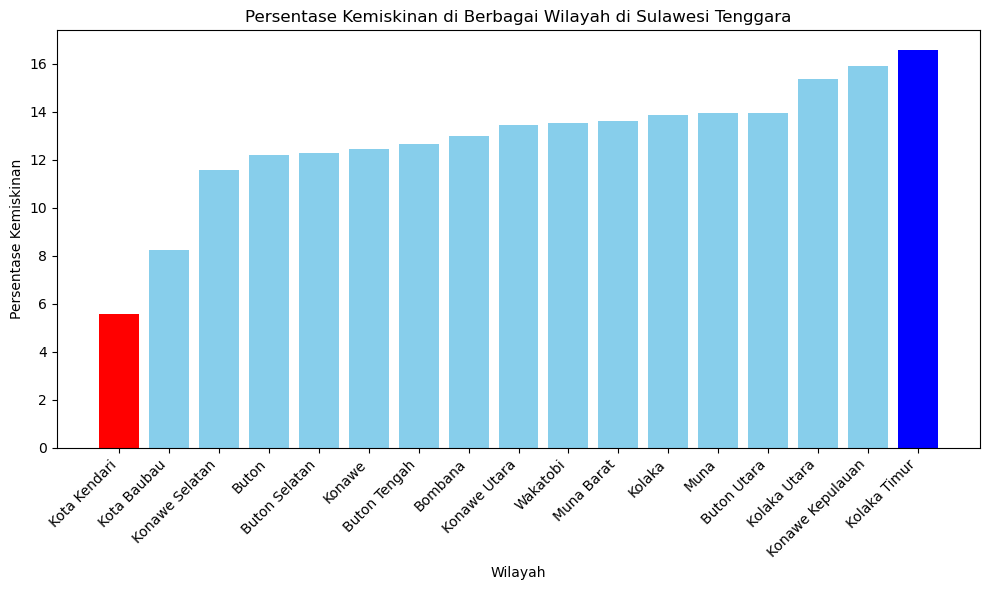

In [ ]:
df_miskin_sorted = df_persentase_miskin.sort_values(by='Persentase Miskin')
# Menemukan persentase tertinggi dan terendah
max_percentage = df_miskin_sorted['Persentase Miskin'].max()
min_percentage = df_miskin_sorted['Persentase Miskin'].min()

# Membuat bar chart dengan warna berbeda untuk persentase tertinggi dan terendah
colors = ['red' if persentase == min_percentage else ('blue' if persentase == max_percentage else 'skyblue') for persentase in df_miskin_sorted['Persentase Miskin']]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_miskin_sorted['Wilayah'], df_miskin_sorted['Persentase Miskin'], color=colors)
plt.title('Persentase Kemiskinan di Berbagai Wilayah di Sulawesi Tenggara')
plt.xlabel('Wilayah')
plt.ylabel('Persentase Kemiskinan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan bar chart
plt.show()

Dapat dilihat dari visualisasi diatas bahwa persentase kemiskinan paling tinggi di Sulawesi Tenggara adalah di Kolaka Timur sedangkan untuk persentase kemiskinan paling rendah ada di Kota Kendari

sa mo visualisasikan data kemiskinan disultra pakai peta, tpi nnti. som vsulaisasikan dlu pakai scatter plot antara stunting dan kemiskinan

##### Visualisasia Data Persentase Pernikahan Dini

In [ ]:
df_persentase_pernikahan = pd.DataFrame({'Wilayah': df_pernikahan['Wilayah'], 'Persentase Nikah Dini': df_pernikahan['<=16'] + df_pernikahan['17-18'] + df_pernikahan['19-20']})

In [ ]:
df_persentase_pernikahan['Persentase Nikah Dini'] = (df_persentase_pernikahan['Persentase Nikah Dini']/df_persentase_pernikahan['Persentase Nikah Dini'].sum())*100

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


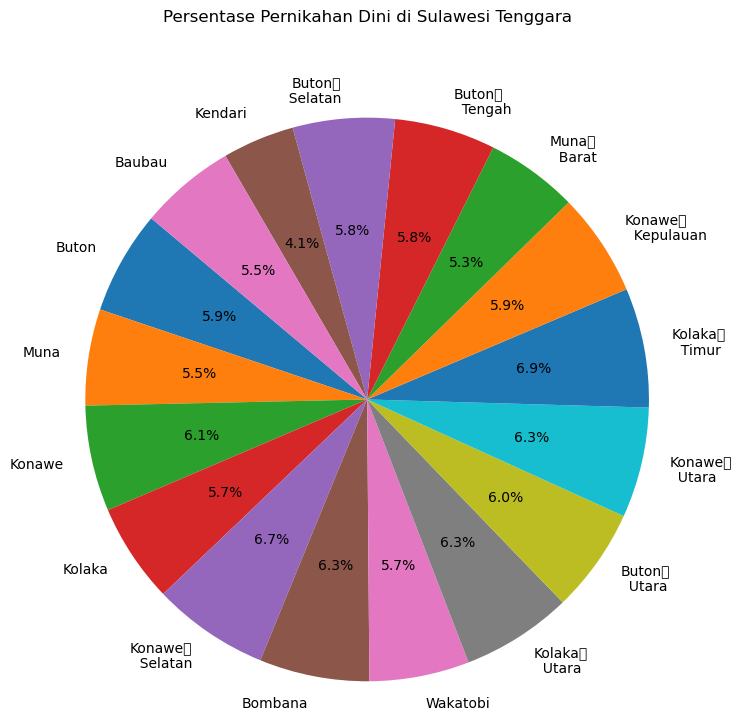

In [ ]:
# Membuat pie chart dengan label di tengah-tengah sektor dan persentase berdekatan
plt.figure(figsize=(8, 8))
plt.pie(df_persentase_pernikahan['Persentase Nikah Dini'], labels=df_persentase_pernikahan['Wilayah'], autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pernikahan Dini di Sulawesi Tenggara', y=1.1)  # Atur posisi vertikal judul dengan nilai y yang lebih tinggi
plt.axis('equal')

# Menampilkan pie chart
plt.show()

Dari visualisasi data diatas mengenai data Persentase Pernikahan Dini di Sulawesi Tenggara dapat dilihat bahwa lagi - lagi Kolaka Timur memliki persenan tertinggi diantara kota/kabupaten lainnya

##### Visualisasi Data Bayi

In [ ]:
df_persentase_bblr = pd.DataFrame({'Wilayah':df_bayi['Wilayah'], 'Persentase BBLR':(df_bayi['Berat Bayi Lahir Rendah']/df_bayi['Bayi Lahir'])*100})

In [ ]:
df_persentase_bblr['Persentase BBLR'] = (df_persentase_bblr['Persentase BBLR']/df_persentase_bblr['Persentase BBLR'].sum())*100

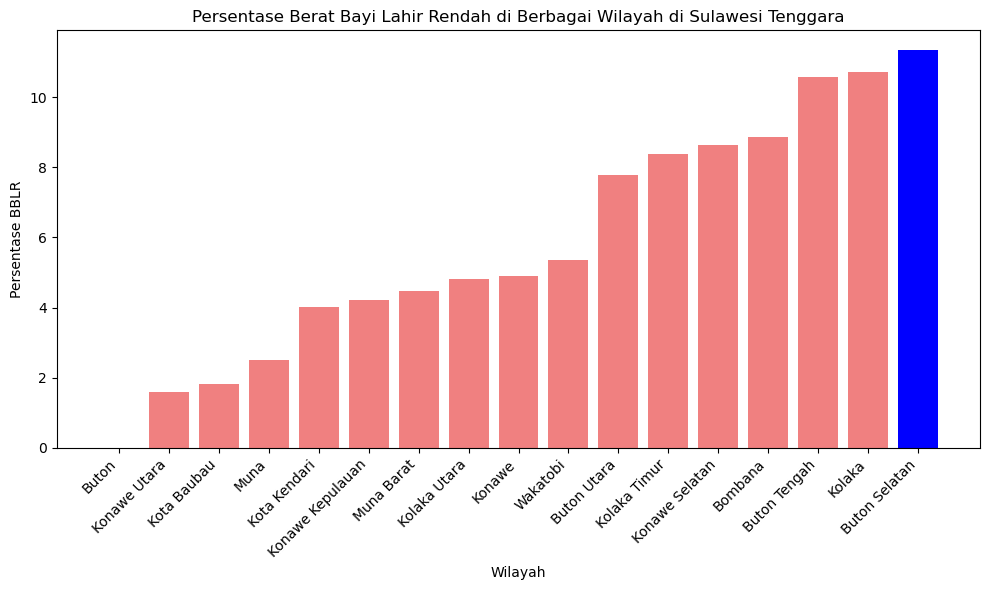

In [ ]:
df_bblr_sorted = df_persentase_bblr.sort_values(by='Persentase BBLR')

# Membuat bar chart
plt.figure(figsize=(10, 6))
colors = ['blue' if persentase == max(df_bblr_sorted['Persentase BBLR']) else 'red' if persentase == min(df_bblr_sorted['Persentase BBLR']) else 'lightcoral' for persentase in df_bblr_sorted['Persentase BBLR']]
plt.bar(df_bblr_sorted['Wilayah'], df_bblr_sorted['Persentase BBLR'], color=colors)
plt.xlabel('Wilayah')
plt.ylabel('Persentase BBLR')
plt.title('Persentase Berat Bayi Lahir Rendah di Berbagai Wilayah di Sulawesi Tenggara')
plt.xticks(rotation=45, ha='right')

# Menampilkan bar chart
plt.tight_layout()
plt.show()

##### Visualisasi Data Akses Sanitasi

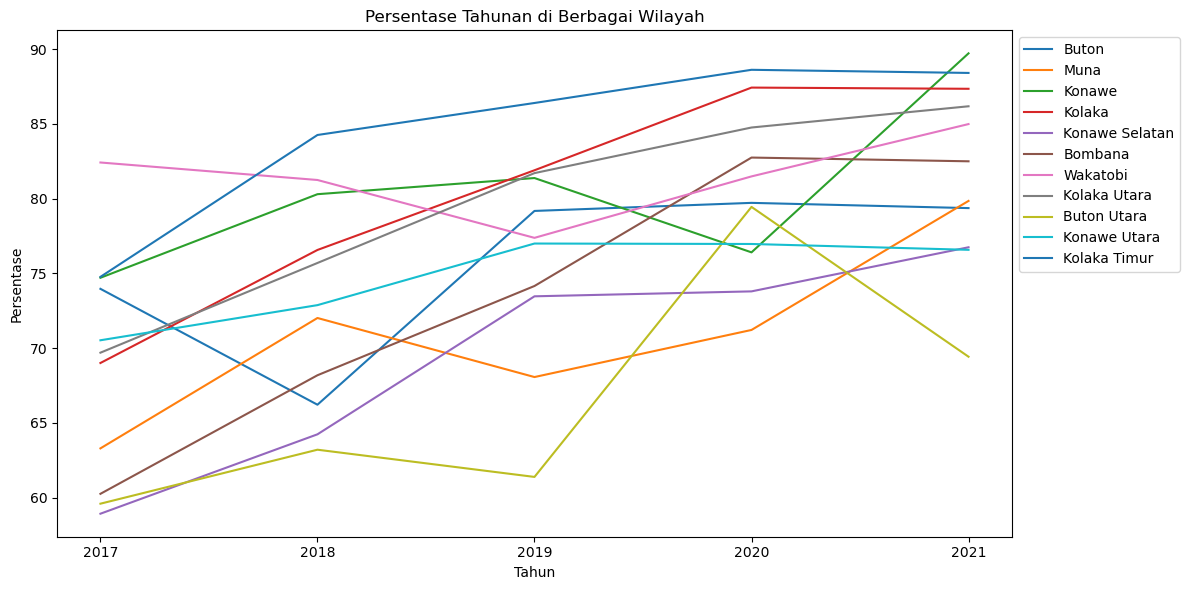

In [ ]:
# Membuat diagram garis
plt.figure(figsize=(12, 6))
for i in range(len(wilayah)):
    plt.plot(['2017', '2018', '2019', '2020', '2021'], [df_sanitasi['2017'][i], df_sanitasi['2018'][i], df_sanitasi['2019'][i], df_sanitasi['2020'][i], df_sanitasi['2021'][i]], label=df_sanitasi['wilayah'][i])

plt.xlabel('Tahun')
plt.ylabel('Persentase')
plt.title('Persentase Tahunan di Berbagai Wilayah')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Menampilkan legenda di luar plot

# Menampilkan diagram garis
plt.tight_layout()
plt.show()

 Visualisasi ini memberikan gambaran tentang perkembangan persentase sanitasi di berbagai wilayah di Sulawesi Tenggara selama lima tahun terakhir. Kita dapat melihat perubahan dari tahun ke tahun.

### Data Analisis

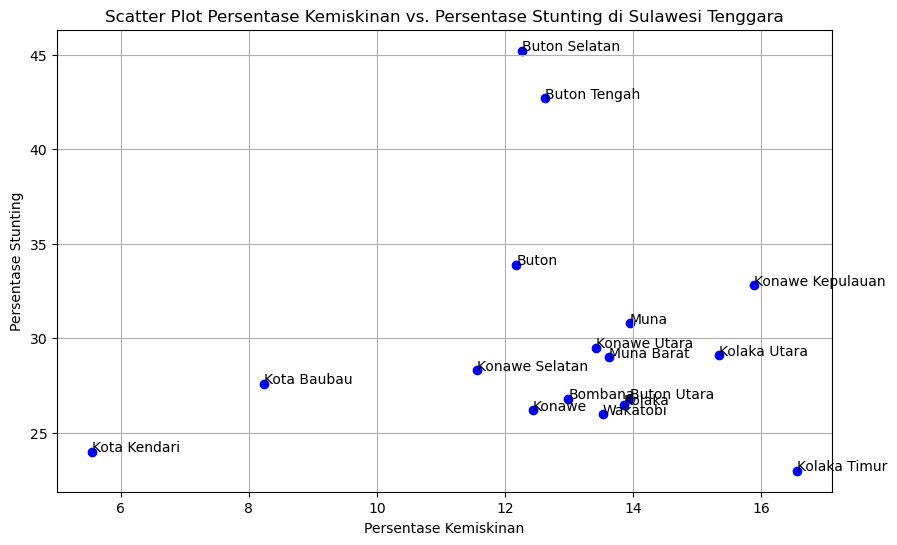

In [ ]:
# Menggabungkan DataFrames berdasarkan kolom 'Wilayah'
df_perbandingan_miskinstunting = pd.merge(df_persentase_miskin, df_stunting, on='Wilayah')

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_perbandingan_miskinstunting['Persentase Miskin'], df_perbandingan_miskinstunting['Persentase Stunting'], c='blue', marker='o')
plt.title('Scatter Plot Persentase Kemiskinan vs. Persentase Stunting di Sulawesi Tenggara')
plt.xlabel('Persentase Kemiskinan')
plt.ylabel('Persentase Stunting')
plt.grid(True)

# Menambahkan label untuk setiap titik (nama wilayah)
for i, wilayah in enumerate(df_perbandingan_miskinstunting['Wilayah']):
    plt.annotate(wilayah, (df_perbandingan_miskinstunting['Persentase Miskin'][i], df_perbandingan_miskinstunting['Persentase Stunting'][i]))

# Menampilkan plot
plt.show()
# Dalam kode ini, kita menggabungkan dua DataFrames (df_kemiskinan dan df_stunting) berdasarkan kolom 'Wilayah' untuk membuat DataFrame df yang berisi data persentase kemiskinan dan stunting. Kemudian kita membuat scatter plot dari DataFrame df tanpa perlu menulis ulang datanya.

Gambar diatas merupakan grafik scatter hubungan antara stunting dan kemiskinan. Dari hasil yang didapatkan dapat dilihat bahwa kemiskinan tidak terlalu berpengaruh terhadap pertumbuhan stunting. Karna berdasarkan data, Buton Selatan memiliki persentase stunting tertinggi padahal persentase kemiskinan di wilayah tersebut tidak setinggi Kolaka Timur.

) missing from current font.\Temp\ipykernel_21468\3670158372.py:23: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


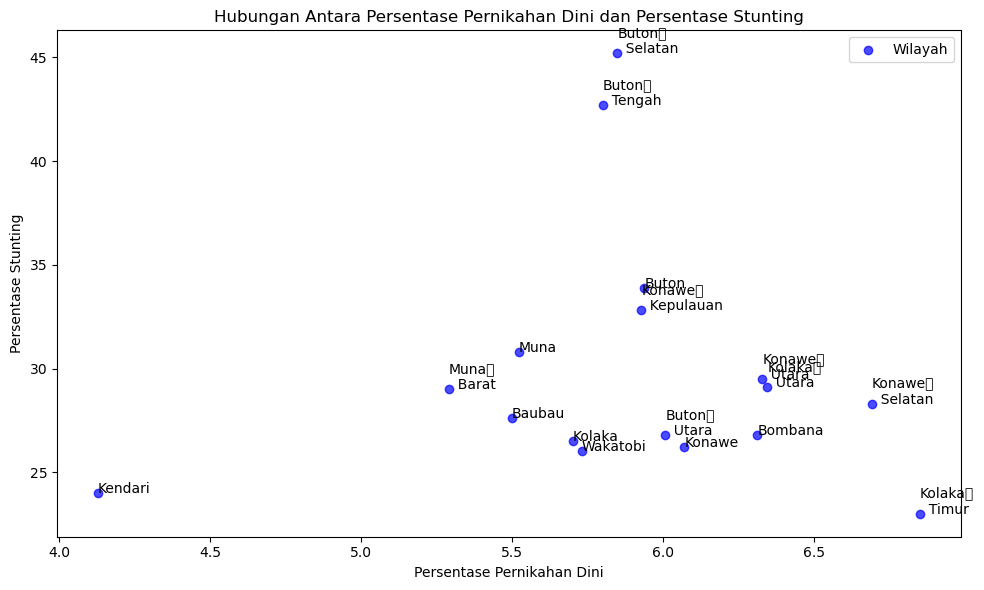

In [ ]:
# Data persentase pernikahan dini dan persentase stunting
x = df_persentase_pernikahan['Persentase Nikah Dini']
y = df_stunting['Persentase Stunting']
wilayah = df_persentase_pernikahan['Wilayah']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Wilayah', color='blue', alpha=0.7)

# Memberikan label pada setiap titik (opsional)
for i, w in enumerate(wilayah):
    plt.annotate(w, (x[i], y[i]))

# Memberikan label sumbu
plt.xlabel('Persentase Pernikahan Dini')
plt.ylabel('Persentase Stunting')

# Menambahkan judul
plt.title('Hubungan Antara Persentase Pernikahan Dini dan Persentase Stunting')

# Menampilkan scatter plot
plt.legend()
plt.tight_layout()
plt.show()

Dari perbandignan antara persentase pernikahan dini da stunting juga dapat dilihat bhwa Buton Selatan memiliki persentase pernkahan dini ditengah - tengah dan bukan tertinggi.

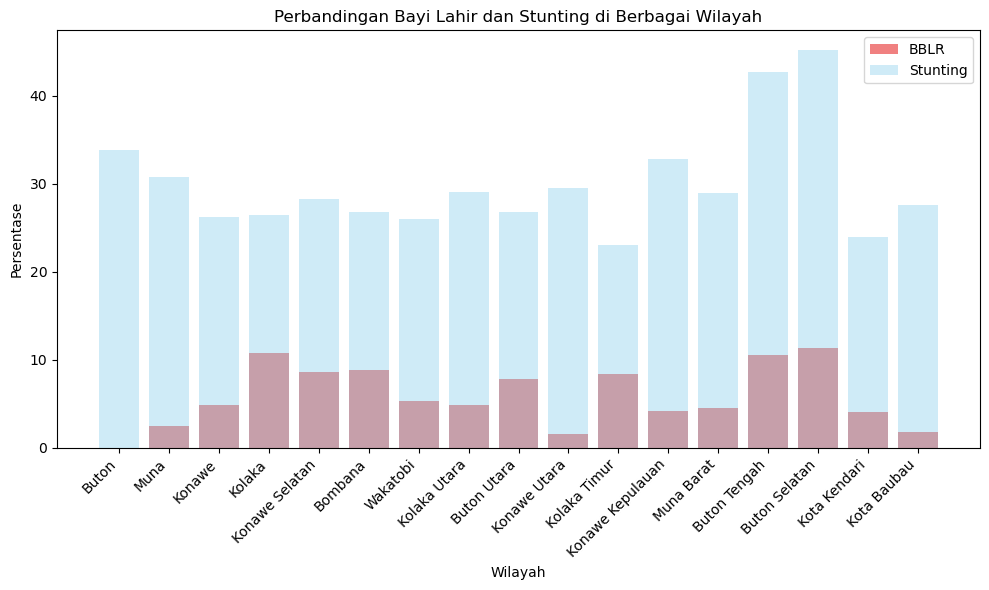

In [ ]:
# Data bayi lahir dan stunting
wilayah = df_stunting['Wilayah']
persentase_bblr = df_persentase_bblr['Persentase BBLR']
persentase_stunting = df_stunting['Persentase Stunting']

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(wilayah, persentase_bblr, label='BBLR', color='lightcoral')
plt.bar(wilayah, persentase_stunting, label='Stunting', color='skyblue', alpha=0.4)

# Memberikan label sumbu
plt.xlabel('Wilayah')
plt.ylabel('Persentase')
plt.title('Perbandingan Bayi Lahir dan Stunting di Berbagai Wilayah')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Menampilkan bar chart
plt.tight_layout()
plt.show()

Persentase BBLR atau Berat Bayi Lahir Rendah cukup berkontribusi dengan tingginya angka stunting. Dapat dilihat pada diagram batang diatas persentase BBLR Buton Selatan merupakan yang tertinggi hal ini sebanding dengan persentase stunting di wilayah tersebut

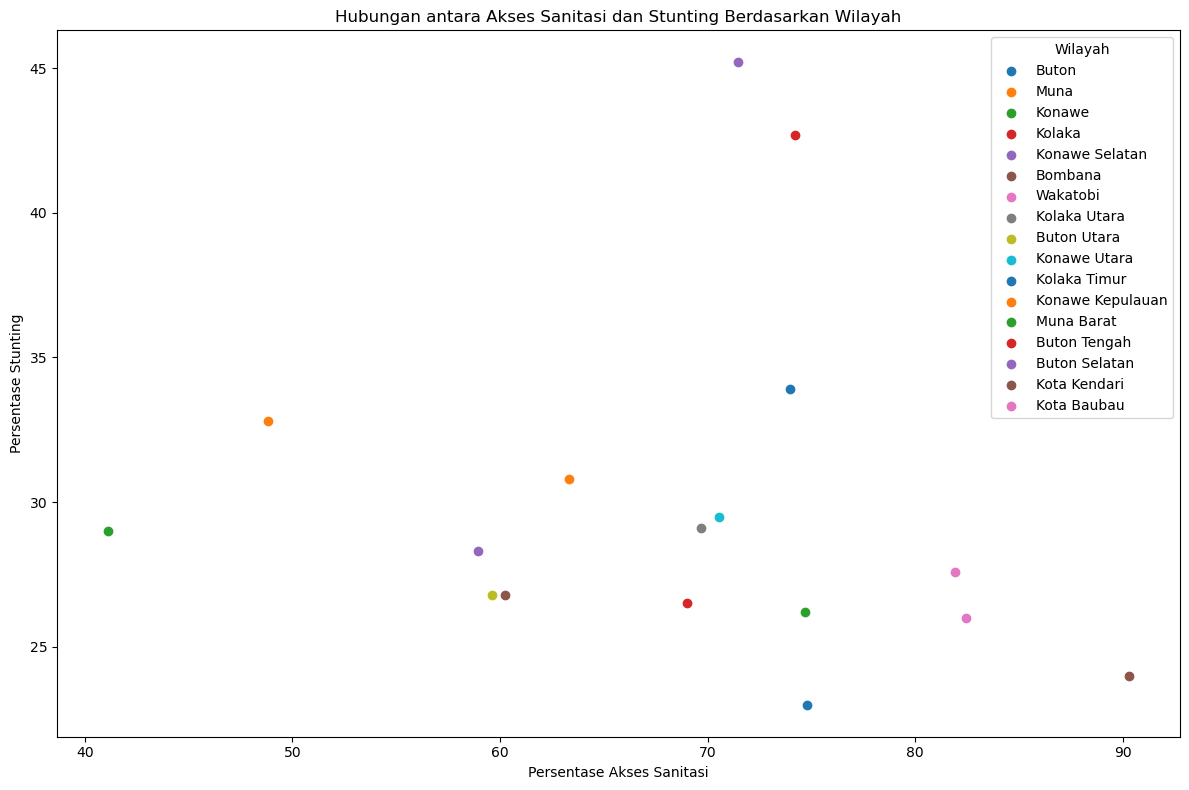

In [ ]:
# Data persentase akses sanitasi dan persentase stunting
wilayah = df_sanitasi['wilayah']
persentase_sanitasi_2017 = df_sanitasi['2017']
persentase_sanitasi_2018 = df_sanitasi['2018']
persentase_sanitasi_2019 = df_sanitasi['2019']
persentase_sanitasi_2020 = df_sanitasi['2020']
persentase_sanitasi_2021 = df_sanitasi['2021']

persentase_stunting = df_stunting['Persentase Stunting']

# Menggabungkan data persentase akses sanitasi dan stunting
df_combined = pd.DataFrame({
    'Wilayah': wilayah,
    'Persentase Akses Sanitasi 2017': persentase_sanitasi_2017,
    'Persentase Akses Sanitasi 2018': persentase_sanitasi_2018,
    'Persentase Akses Sanitasi 2019': persentase_sanitasi_2019,
    'Persentase Akses Sanitasi 2020': persentase_sanitasi_2020,
    'Persentase Akses Sanitasi 2021': persentase_sanitasi_2021,
    'Persentase Stunting': persentase_stunting
})

# Membuat scatter plot untuk setiap wilayah
unique_wilayah = df_combined['Wilayah'].unique()

plt.figure(figsize=(12, 8))

for wilayah in unique_wilayah:
    data_wilayah = df_combined[df_combined['Wilayah'] == wilayah]
    plt.scatter(data_wilayah['Persentase Akses Sanitasi 2017'], data_wilayah['Persentase Stunting'], label=wilayah)

# Memberikan label sumbu
plt.xlabel('Persentase Akses Sanitasi')
plt.ylabel('Persentase Stunting')
plt.title('Hubungan antara Akses Sanitasi dan Stunting Berdasarkan Wilayah')

# Menampilkan legenda
plt.legend(title='Wilayah')

# Menampilkan scatter plot
plt.tight_layout()
plt.show()


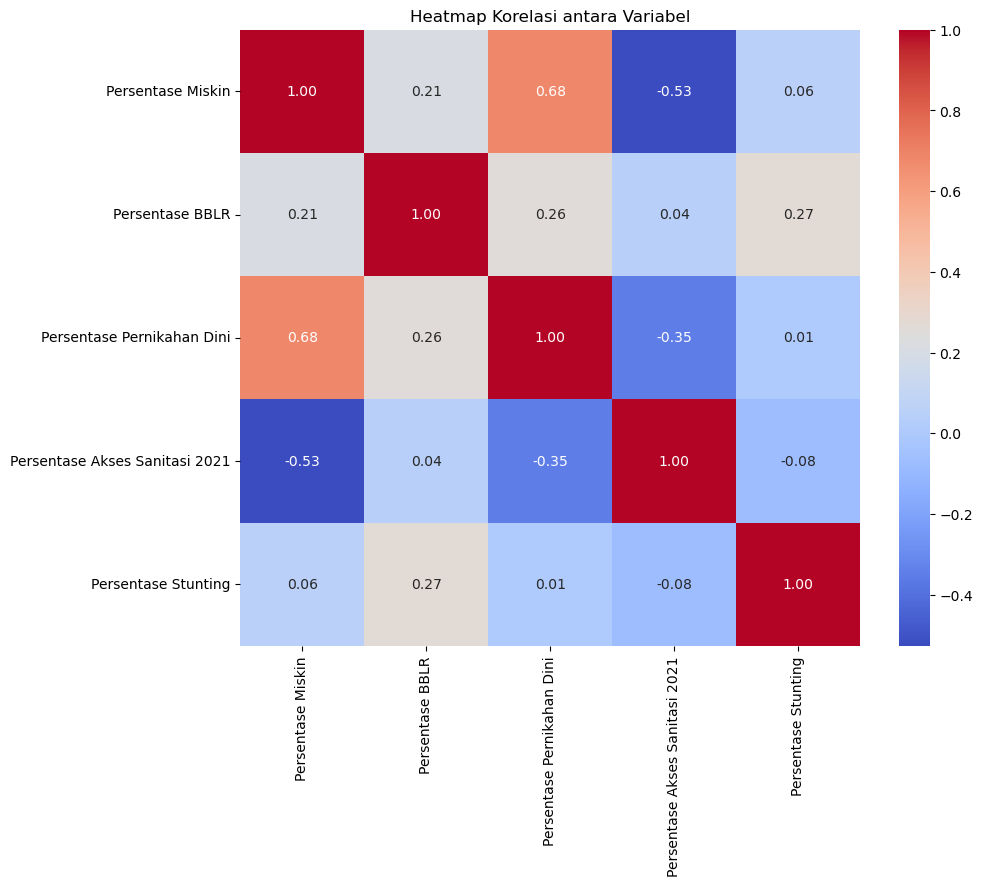

In [ ]:
# Data persentase miskin, BBLR, pernikahan dini, akses sanitasi, dan stunting
data = {
    'Persentase Miskin': df_persentase_miskin['Persentase Miskin'],
    'Persentase BBLR': df_persentase_bblr['Persentase BBLR'],
    'Persentase Pernikahan Dini': df_persentase_pernikahan['Persentase Nikah Dini'],
    'Persentase Akses Sanitasi 2021': df_sanitasi['2021'],
    'Persentase Stunting': df_stunting['Persentase Stunting']
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung korelasi antara variabel-variabel
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap Korelasi antara Variabel')
plt.show()


Analisis data yang dilakukan di atas menunjukkan beberapa temuan yang dapat diambil sebagai hasil dari projek ini. Berikut adalah hasil analisisnya:

1. Kemiskinan dan Stunting:
Dari analisis persentase kemiskinan dan persentase stunting, terlihat bahwa tidak ada hubungan yang kuat antara kemiskinan dan stunting di Sulawesi Tenggara. Meskipun Kolaka Timur memiliki persentase kemiskinan tertinggi, persentase stunting di sana tidak sebanding.

2. Pernikahan Dini dan Stunting:
Pernikahan dini juga tidak menunjukkan korelasi yang kuat dengan stunting. Meskipun Kolaka Timur memiliki persentase pernikahan dini tertinggi, hal ini tidak langsung mengakibatkan tingginya persentase stunting.

3. Berat Bayi Lahir Rendah (BBLR) dan Stunting:
Analisis antara persentase berat bayi lahir rendah (BBLR) dan persentase stunting menunjukkan bahwa tidak ada hubungan korelasi yang signifikan di antara keduanya. Beberapa wilayah memiliki tingkat BBLR yang tinggi tetapi persentase stunting yang relatif rendah.

4. Akses Sanitasi dan Stunting:
Dalam analisis akses sanitasi, meskipun sebagian besar wilayah memiliki akses sanitasi di atas 80%, tidak ada korelasi yang kuat antara akses sanitasi dan stunting. Namun, di beberapa wilayah yang memiliki akses sanitasi rendah (terutama di Buton Utara), persentase stunting cenderung tinggi.

5. Korelasi Antar Variabel:
Dari heatmap korelasi, dapat dilihat bahwa tidak ada korelasi yang signifikan antara variabel-variabel yang diteliti. Korelasi antara persentase kemiskinan, BBLR, pernikahan dini, akses sanitasi, dan stunting mendekati 0, menunjukkan bahwa tidak ada hubungan linier yang kuat antara variabel-variabel tersebut.



Berdasarkan grafik - grafik diatas hubungan antara persentase dan variabel yang memengaruhi stunting yang telah kami teliti seperti kemiskinan, pernikahan dini, Berat Bayi Lahir Rendah dan akses sanitasi tidak ada yang berhubungan secara sginifikan.

Dari hasil grafik diatas Buton Selatan merupaka daerah dengan stunting tertinggi namun Buton Selatan bukan merupakan wilayah yang memiliki persentase tertinggi pada kemiskinan, pernikahan dini, Berat Bayi Lahir Rendah dan akses sanitasi.

Namun mengapa Buton Selatan memiliki persentase stunting tertinggi karna berdasarkan jurnal KAMPURUI JURNAL
KESEHATAN MASYARAKAT di Buton Selatan tingkat pendidikannya terutama pada Ibu itu masih kurang, sehingga mereka belum terlalu memahami bagaimana pola asuh anak

Kesimpulan:
Berdasarkan analisis yang telah dilakukan, tidak dapat disimpulkan bahwa satu faktor tunggal secara langsung mempengaruhi tingkat stunting di Sulawesi Tenggara. Faktor-faktor sosial ekonomi seperti kemiskinan, pernikahan dini, dan akses sanitasi tidak secara langsung berkorelasi dengan tingkat stunting yang tinggi di beberapa wilayah.

Oleh karena itu, untuk mengatasi masalah stunting, perlu dilakukan analisis lebih mendalam yang melibatkan faktor-faktor lain seperti pola makan, pengetahuan, dan pendidikan ibu. Selain itu, perlu dilakukan penelitian lebih lanjut untuk memahami dinamika kompleks yang mendasari tingginya tingkat stunting di beberapa wilayah Sulawesi Tenggara.